# 201810808 정민지

---
# 문제1: 회귀분석

#### 데이터 생성

In [21]:
from sklearn.datasets import make_regression
X, y, coef = make_regression(n_samples = 100,
                            n_features = 4,
                            n_informative = 3,
                            n_targets = 1,
                            noise = 0.0,
                            coef = True)

## (1-1) gradient 방법으로 회귀식을 계산하고, 결과를 [식-1]의 coef와 비교하세요.
주의: 반복이 많으면 감점 (예를 들어, 1000 이상이면 많다고 간주할 것임)

In [22]:
import numpy as np
alpha = 0.02
theta=np.array(np.ones([X.shape[1]]))

In [23]:
def gradientDescent(x,y,theta,alpha,numIterations):
    for i in range(numIterations):
        #i+=1
        h=np.dot(x,theta)
        error=h-y
        cost=np.sum((h-y)**2)/len(x) #full MSE
        gradient=np.dot(x.T,error)*2/len(x) #w0,w1
        theta-=alpha*gradient
        if i%100==0:
            print("Iteration {0} | theta{1} Cost {2:.5f}".format(i,theta,cost))

    return theta

### 답

In [24]:
w4,w3,w2,w1=gradientDescent(X, y, theta, alpha, 800) 

Iteration 0 | theta[2.24629114 0.88364649 0.7679684  3.08197263] Cost 2861.72247
Iteration 100 | theta[23.62679504  2.97537701 -0.08147209 42.1159372 ] Cost 0.13771
Iteration 200 | theta[ 2.37264296e+01  3.11821416e+00 -7.68083370e-04  4.23810187e+01] Cost 0.00001
Iteration 300 | theta[ 2.37273288e+01  3.12023292e+00 -2.69493375e-06  4.23831787e+01] Cost 0.00000
Iteration 400 | theta[2.37273420e+01 3.12026107e+00 7.99086593e-08 4.23831960e+01] Cost 0.00000
Iteration 500 | theta[2.37273422e+01 3.12026151e+00 2.97171753e-09 4.23831961e+01] Cost 0.00000
Iteration 600 | theta[2.37273422e+01 3.12026152e+00 7.44988405e-11 4.23831961e+01] Cost 0.00000
Iteration 700 | theta[2.37273422e+01 3.12026152e+00 1.67962357e-12 4.23831961e+01] Cost 0.00000


In [25]:
print("예측 결과:      %.8f  %.8f  %.8f  %.8f"%(w4,w3,w2,w1))
print("[식-1의] coef:  %.8f  %.8f  %.8f  %.8f"%(coef[0],coef[1],coef[2],coef[3]))

예측 결과:      23.72734222  3.12026152  0.00000000  42.38319610
[식-1의] coef:  23.72734222  3.12026152  0.00000000  42.38319610


## (1-2) Spark DataFrame을 생성

In [26]:
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
sc = SparkContext('local')
spark = SparkSession(sc)

In [27]:
import pandas as pd
pdDf=pd.DataFrame(X)
pdDf['y']=y

In [28]:
Df=spark.createDataFrame(pdDf)

In [29]:
Df = Df.withColumnRenamed("0", "x0")
Df = Df.withColumnRenamed("1", "x1")
Df = Df.withColumnRenamed("2", "x2")
Df = Df.withColumnRenamed("3", "x3")


### 답

In [30]:
Df.show(5)

+-------------------+--------------------+-------------------+-------------------+------------------+
|                 x0|                  x1|                 x2|                 x3|                 y|
+-------------------+--------------------+-------------------+-------------------+------------------+
| -0.604224956614758| -0.7850773905370131|-2.1492999359347533|  2.455132387435317| 87.27005833277728|
| 1.2234748432832439| -1.8133132180358915| 1.2284104534170717|-0.4090467322602572|6.0350869693193605|
|-0.6412433987955526|   1.476876514356458|-1.1722121179185025| 0.3868372103257514|5.7886367382409105|
| 1.1229478413277374|-0.21089111121369364|-0.5141299135465561|-1.1757348995768857|-23.84487050807958|
| 0.8357484242073062|  0.5820473821690937|-0.2849184399017169|-0.5859769707735916|-3.189347943811481|
+-------------------+--------------------+-------------------+-------------------+------------------+
only showing top 5 rows



## (1-3-1) 이상값은 표준편차가 3 sigma, -3 ~ 3이 아닌 경우를 말한다. 이상 값을 계산하고 출력.

In [31]:
Xstd=X.std()
print(Xstd) #표준편차

1.06914655056695


### 답

In [32]:
lower=Xstd*-3
upper=Xstd*3
print(lower,upper)#이상값 범위

-3.2074396517008497 3.2074396517008497


In [33]:
print("outlier x0")
Df.filter((Df.x0<lower) | (Df.x0>upper)).show()
print("outlier x1")
Df.filter((Df.x1<lower) | (Df.x1>upper)).show()
print("outlier x2")
Df.filter((Df.x2<lower) | (Df.x2>upper)).show()
print("outlier x3")
Df.filter((Df.x3<lower) | (Df.x3>upper)).show()

outlier x0
+---+---+---+---+---+
| x0| x1| x2| x3|  y|
+---+---+---+---+---+
+---+---+---+---+---+

outlier x1
+---+---+---+---+---+
| x0| x1| x2| x3|  y|
+---+---+---+---+---+
+---+---+---+---+---+

outlier x2
+---+---+---+---+---+
| x0| x1| x2| x3|  y|
+---+---+---+---+---+
+---+---+---+---+---+

outlier x3
+---+---+---+---+---+
| x0| x1| x2| x3|  y|
+---+---+---+---+---+
+---+---+---+---+---+



## (1-3-2) null 값이 있는지 출력하세요.

In [34]:
def countNull(df,var):
    return df.where(df[var].isNull()).count()

missing = {c: countNull(Df,c) for c in ['x0','x1','x2','x3','y']}

print(missing)

{'x0': 0, 'x1': 0, 'x2': 0, 'x3': 0, 'y': 0}


## (1-4-1) 훈련, 테스트 데이터를 6:4 비율로 분리하고,





In [35]:
(trainDf, testDf) = Df.randomSplit([0.6, 0.4])

## (1-4-2) 회귀모델링하고 계수와 절편 출력하세요.

In [36]:
from pyspark.ml.feature import VectorAssembler
va = VectorAssembler(inputCols = ["x0","x1","x2","x3"],
                                   outputCol = 'features')

In [37]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='y', maxIter=10, regParam=0.3, elasticNetParam=0.8)

In [38]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=[va,lr])

In [39]:
model = pipeline.fit(trainDf)
modelTrainDf = model.transform(trainDf)

In [40]:
print("Coefficients: {}".format(model.stages[-1].coefficients))
print("Intercept: {:.3f}".format(model.stages[-1].intercept)) #y절편

Coefficients: [23.48724477173305,2.8682337477787994,0.0,42.10744382163696]
Intercept: 0.070


## (1-5) 테스트데이터에 대해 정확성을 출력하세요.

In [41]:
modelTestDf=model.transform(testDf)

In [42]:
from pyspark.ml.evaluation import RegressionEvaluator

evaluator=RegressionEvaluator(labelCol="y", predictionCol="prediction", metricName="rmse")

In [43]:
rmse=evaluator.evaluate(modelTestDf)

In [44]:
f"Root Mean Squared Error (RMSE) on test data: {rmse:.8f}"

'Root Mean Squared Error (RMSE) on test data: 0.44785733'

In [45]:
from pyspark.ml.evaluation import RegressionEvaluator

evaluator=RegressionEvaluator(labelCol="y", predictionCol="prediction", metricName="r2")

In [46]:
f"r2: {evaluator.evaluate(modelTestDf):.8f}"

'r2: 0.99994000'

---
---
# 문제2: 클러스터링

make_blobs() 함수로, 데이터 200개, 클러스터 5개, 표준편차는 0.5로 설정해서 데이터를 생성하고 다음을 푸세요.


#### 데이터 생성

In [47]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, centers=5, cluster_std=0.50, random_state=0)

## (2-1) 강의코드 cluster() 함수를 수정해서 클러스터 중심점을 계산하여 출력하세요. 
함수를 수정하여 **반복횟수와 중심값만**을 출력한다.
## (2-2) 반복마다 데이터산포와 중심점 (빨간색)을 그려서, 중심점이 올바르게 이동해 가는 것을 알 수 있게 하세요.

#### 함수 선언

In [48]:
def normDist(x1, x2):
    dist = np.linalg.norm(x1 - x2) 
    return dist

In [49]:
def draw(x, centroids):
    import matplotlib.pyplot as plt
    #plt.subplot(5,2,iter)
    plt.scatter(x[:,0], x[:,1], color='blue')
    plt.scatter(centroids[:,0], centroids[:,1], color='red')
    plt.show()

In [50]:
def cluster(x, k, centroids): #x,k, 초기중심점
    row, col = x.shape
    clusterAssigned = np.zeros(shape=(row, col), dtype=float)
    # print (clusterAssigned)
    clusterUpdated=True
    iter = 1
    while(clusterUpdated):
        print ("\n\n====== Iteration {} ======".format(iter))
        # STEP 1: assign to closer cluster
        for i in range(row):
            minDist = np.inf   # set arbitray max to minDist
            minIndex = -1      # set arbitray index to minIndex
            # compute distance and assign to closer cluster
            for j in range(k):
                # distance from centroids[j] to x[0]
                distJI = normDist(centroids[j], x[i])
                # pick the closest centroid
                if distJI < minDist:
                    minDist = distJI
                    minIndex = j
            clusterAssigned[i] = [minIndex, minDist]
        
        # STEP 2: update centroids
        _centroids=np.zeros(shape = (k, x.shape[1]), dtype=float)
        for cent in range(k):
            # read data by index and average them
            _centroids[cent] = np.mean(x[clusterAssigned[:,0]==cent],axis=0)
        
        # STEP 3: see if centroids is updated. STOP if NOT updated
        comparison = np.equal(centroids, _centroids) # np.isclose() in case some tolerence is required
        if(comparison.all() == True):
            print ("\n.....NOT Updating Centroids!!\n")# {} => \n{}".format(centroids, _centroids))
            print("\n-----Final Centroids is...\n{}\n".format(_centroids))
            draw(X, centroids)
            print("\n We found Centroids at {} times.\n".format(iter))
            clusterUpdated = False
            return centroids, clusterAssigned
        else:
            #print ("\n.....Updating Centroids\n {} => \n{}".format(centroids, _centroids))
            if iter==1:
                print("\n Init Centroids is..\n{}".format(centroids))
            print ("\n.....Updating Centroids To..\n{}".format(_centroids))
            centroids = _centroids
            draw(X, centroids)
            iter += 1

In [51]:
import random
randlist=random.sample(range(200), 5) #중복없이 뽑기
print(randlist)

[72, 84, 94, 158, 195]


### 답



====== Iteration 1 ======

 Init Centroids is..
[[ 9.55690035 -2.44250717]
 [-1.9015192   8.66452536]
 [ 0.5226209   4.32976003]
 [ 1.2091013   3.53566548]
 [ 2.06051753  1.79059891]]

.....Updating Centroids To..
[[ 9.21059989 -2.47392331]
 [-1.36754522  7.89153496]
 [-0.56475071  3.57057883]
 [ 0.77073721  3.44427031]
 [ 2.05487327  1.11105683]]


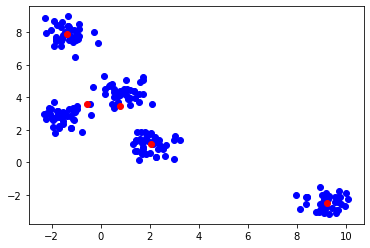



====== Iteration 2 ======

.....Updating Centroids To..
[[ 9.21059989 -2.47392331]
 [-1.36754522  7.89153496]
 [-1.43619923  2.95309662]
 [ 0.98942781  4.23698714]
 [ 2.05487327  1.11105683]]


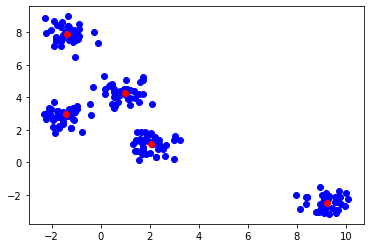



====== Iteration 3 ======

.....Updating Centroids To..
[[ 9.21059989 -2.47392331]
 [-1.36754522  7.89153496]
 [-1.5435162   2.81345511]
 [ 0.91482275  4.28033686]
 [ 2.05487327  1.11105683]]


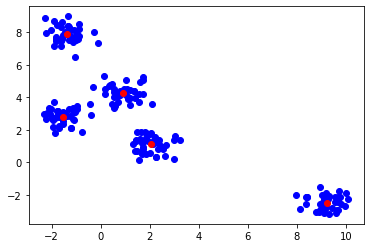



====== Iteration 4 ======

.....NOT Updating Centroids!!


-----Final Centroids is...
[[ 9.21059989 -2.47392331]
 [-1.36754522  7.89153496]
 [-1.5435162   2.81345511]
 [ 0.91482275  4.28033686]
 [ 2.05487327  1.11105683]]



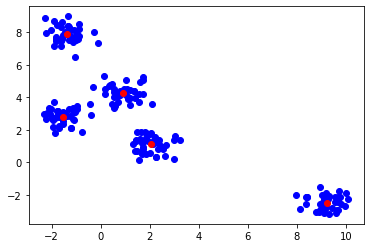


 We found Centroids at 4 times.



In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


k = 5

centroids = np.array([[X[randlist[0],0],X[randlist[0],1]],[X[randlist[1],0],X[randlist[1],1]],[X[randlist[2],0],X[randlist[2],1]],[X[randlist[3],0],X[randlist[3],1]],[X[randlist[4],0],X[randlist[4],1]]], dtype=float)
centroids, clusterAssigned = cluster(X, k, centroids)

## (2-3) Spark DataFrame을 생성하여 클러스터링을 실행하고, 중심점이 (2-1), make_blob()과 동일한지 비교하세요.

#### spark DataFrame 생성

In [53]:
pdblob=pd.DataFrame(X)

In [54]:
dfblob=spark.createDataFrame(pdblob)

In [55]:
from pyspark.ml.feature import VectorAssembler

va = VectorAssembler(inputCols=["0","1"],outputCol="features")

In [56]:
_dfblob = va.transform(dfblob)

In [57]:
_dfblob.show(5,truncate=False)

+-------------------+------------------+---------------------------------------+
|0                  |1                 |features                               |
+-------------------+------------------+---------------------------------------+
|1.7079835915671953 |0.8228463897741014|[1.7079835915671953,0.8228463897741014]|
|-2.2635980086368974|8.867706446321254 |[-2.2635980086368974,8.867706446321254]|
|0.7826066698425189 |4.152635952160722 |[0.7826066698425189,4.152635952160722] |
|-1.1109975958841805|7.39000247414383  |[-1.1109975958841805,7.39000247414383] |
|2.2434802870106925 |0.3479632646458396|[2.2434802870106925,0.3479632646458396]|
+-------------------+------------------+---------------------------------------+
only showing top 5 rows



#### 클러스터링 실행

In [58]:
from pyspark.ml.clustering import KMeans

kmeans = KMeans(k=5)

In [59]:
model = kmeans.fit(_dfblob)

In [60]:
print (model.clusterCenters())

[array([-1.5435162 ,  2.81345511]), array([ 9.21059989, -2.47392331]), array([0.91482275, 4.28033686]), array([-1.36754522,  7.89153496]), array([2.05487327, 1.11105683])]


#### 중심점 비교

In [61]:
#spark kmeans 결과를 numpy array 형태로 바꾸기 (비교용)
spark_kmeans=[]
for i in model.clusterCenters():
    spark_kmeans.append(list(i))
spark_kmeans=np.array(spark_kmeans)

In [62]:
# spark를 통해 나온 중심값
spark_kmeans

array([[-1.5435162 ,  2.81345511],
       [ 9.21059989, -2.47392331],
       [ 0.91482275,  4.28033686],
       [-1.36754522,  7.89153496],
       [ 2.05487327,  1.11105683]])

In [63]:
#2-1결과를 통해 나온 중심값
centroids

array([[ 9.21059989, -2.47392331],
       [-1.36754522,  7.89153496],
       [-1.5435162 ,  2.81345511],
       [ 0.91482275,  4.28033686],
       [ 2.05487327,  1.11105683]])

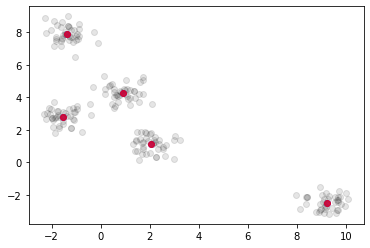

In [64]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], alpha=0.1,color='black')
plt.scatter(centroids[:,0], centroids[:,1],alpha=0.7, color='blue')
plt.scatter(spark_kmeans[:,0], spark_kmeans[:,1],alpha=0.7, color='red')

숫자를 비교하거나 그림으로 그려보았을 때 같은것을 확인 가능

#### 배정된 클러스터 비교 위해 id통일

In [65]:
predict_model=model.transform(_dfblob)
predict_model=predict_model.select(predict_model.prediction)
predict_array=predict_model.rdd.map(lambda x:x[0]).collect()

In [66]:
print(predict_array[:15])
print(y[:15])
print(clusterAssigned[:,0][:15])

[4, 3, 2, 3, 4, 2, 0, 2, 0, 4, 2, 4, 1, 0, 2]
[1 3 0 3 1 0 2 0 2 1 0 1 4 2 0]
[4. 1. 3. 1. 4. 3. 2. 3. 2. 4. 3. 4. 0. 2. 3.]


In [67]:
#make_blob(), y
y_compare=np.array([])
for i in range(len(y)):
    if y[i]==0:
        y_compare=np.append(y_compare,2)
        
    elif y[i]==1:
        y_compare=np.append(y_compare,4)
        
    elif y[i]==2: 
        y_compare=np.append(y_compare,0)
        
    elif y[i]==3: 
        y_compare=np.append(y_compare,3)  
        
    else: #y[i]==4
        y_compare=np.append(y_compare,1)

In [68]:
#2-1 kmeans 함수 이용
compareCluster=np.array([])

for i in range(len(clusterAssigned[:,0])):
    if clusterAssigned[:,0][i]==0:
        compareCluster=np.append(compareCluster,1)
        
    elif clusterAssigned[:,0][i]==1:
        compareCluster=np.append(compareCluster,3)
        
    elif clusterAssigned[:,0][i]==2: 
        compareCluster=np.append(compareCluster,0)

    elif clusterAssigned[:,0][i]==3: 
        compareCluster=np.append(compareCluster,2)
        
    else: #clusterAssigned[:,0][i]==4
        compareCluster=np.append(compareCluster,4)

#### 배정된 클러스터 비교

In [69]:
pd_compare=pd.DataFrame({'spark_center':predict_array,'center_2_1':compareCluster,'y':y_compare})

In [70]:
df_compare=spark.createDataFrame(pd_compare)

In [73]:
#다르게 배정된 경우
df_compare.filter((df_compare.spark_center!=df_compare.center_2_1)|(df_compare.spark_center!=df_compare.y)|(df_compare.y!=df_compare.center_2_1)).show()

+------------+----------+---+
|spark_center|center_2_1|  y|
+------------+----------+---+
+------------+----------+---+



다르게 배정된 경우 없음을 확인

---
---
# 문제3: 텍스트 분류



다음은 축구, 야구 관련 기사에서 발췌한 내용이다. 

읽어보면, 축구인지 야구인지 내용을 식별할 수 있다.

## (3-1) 기사파일을 작성한 후, 파일에서 DataFrame 생성

In [140]:
import os

In [141]:
#문자열에 , 섞여있어서 tsv로 생성함
newsDf = spark\
    .read\
    .options(header='false', inferschema='true', delimiter='\t')\
    .csv(os.path.join('data', 'soccer_baseball_e.txt'))

In [142]:
newsDf = newsDf.withColumnRenamed("_c0", "news")
newsDf = newsDf.withColumnRenamed("_c1", "label")

In [143]:
newsDf.show(5)

+---------------------------------+-----+
|                             news|label|
+---------------------------------+-----+
| 페널티킥 내준 상황에 대해선 "...|    0|
|수원은 후반 막판 공격 상황에서...|    0|
|   주심은 VAR 끝에 페널티 킥을...|    0|
|  전반 11분 박스 안에서 유려한...|    0|
|  맨유는 전반 35분 마커스 래시...|    0|
+---------------------------------+-----+
only showing top 5 rows



## (3-2) 불용어 제거, 숫자 단어 제거, 정리

#### 단어로 분리

In [144]:
from pyspark.ml.feature import Tokenizer
tokenizer = Tokenizer(inputCol="news", outputCol="tokens")
tokDf = tokenizer.transform(newsDf)

####  인용부호 컴마 마침표 제거, 숫자단어 제거, 같은단어 취급하기

In [145]:
import re

def trim(wordList):
    cleaned=list()
    delnum=list()
    
    for w in wordList:
        #### 인용부호, 컴마, 마침표 제거
        ####헤딩 골-헤딩골, 페널티 킥-페널티킥을 같은 단어로 취급
        cleaned.append(w.lstrip('‘').rstrip("’").rstrip(',').rstrip('.').replace("’","").replace("”","").replace('"',"").replace("'","").replace("헤딩 골","헤딩골").replace("페널티 킥","페널티킥"))
        
    
    #### 숫자(로만 이루어진) 단어 모두 제거
    for i in cleaned:
        i_del=i.replace(".","") # 위에서 .은 마침표만 제거함, 소수점 검사하기 위하여!
        if not(i_del.isnumeric()):
            delnum.append(i)
    return delnum

In [146]:
from pyspark.sql import functions as f
from pyspark.sql.types import ArrayType, StringType

trimUdf=f.udf(trim, ArrayType(StringType()))

In [147]:
wordsDf = tokDf.withColumn('words', trimUdf(f.col('tokens')))

####  불용어 - 한 단어는 모두 제거 (단, '팀'은 제외) 

In [148]:
## 한글자 단어 찾기 위함
def find_one(wordList):
    one=list()
    for w in wordList:
        if len(w)==1:
            one.append(w)
    return one        

In [149]:
findone=f.udf(find_one, ArrayType(StringType()))

In [150]:
onewordsDf = wordsDf.withColumn('one_words', findone(f.col('words')))

In [151]:
one_words_array=onewordsDf.rdd.map(lambda x:x[4]).collect()
one_words_list=list()
for i in one_words_array:
    for j in i:
        one_words_list.append(j)

In [152]:
one_words_list=set(one_words_list)
###팀은 제외
one_words_list.remove('팀')
print(one_words_list) #한글자 단어 list

{'알', '뒤', '못', '더', '될', '네', '꽉', '번', '안', '된', '첫', '전', '이', '몫', '단', '총', '초', '등', '잘', '지', '그', '쓸', '데', '올', '간', '볼', '친', '후', '해', '달', '제', '점', '때', '수', 'a', '세', '할', '두', '건', '줄', '한'}


In [153]:
from pyspark.ml.feature import StopWordsRemover

In [154]:
# 영어 stopwords 제거
stop = StopWordsRemover(inputCol="words", outputCol="nostops")
stopwords=list()
_stopwords=stop.getStopWords()
for e in _stopwords:
    stopwords.append(e)

In [155]:
#팀을 제외한 한글자 단어 stopwords에 추가
for e in one_words_list:
    stopwords.append(e)

#### 불용어 - '우리', '그러나'와 같은 유의미하지 않은 대명사, 접속사 등

In [156]:
_mystopwords=["우리","자신이","그러나","그런","이번","따라","모두","또한","때라고","최소","그쪽","이를","됐다","같은","여러","들어","결국","결과적으로","넉넉한","듯하다라고","이날","이어","나고","있다","가장","결정적인","대거","있었다는","대해","나서","열린","대해선","라고","자기","지난해"]
for e in _mystopwords:
    stopwords.append(e)

In [157]:
stop.setStopWords(stopwords)

StopWordsRemover_dfc951145550

#### 불용어 제거

In [158]:
stopDf=stop.transform(wordsDf) #불용어 제거 된 컬럼
stopDf.select('words','nostops').show(3,False)

+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|words                                                                                                                                                                                                                                                               |nostops                                                                                                                                                                                                         |
+-------------------------------------------------------

##  (3-3) TF-IDF를 계산

In [159]:
from pyspark.ml.feature import HashingTF, IDF
hashTF = HashingTF(inputCol="nostops", outputCol="features")
hashDf = hashTF.transform(stopDf)

In [160]:
idf = IDF(inputCol="features", outputCol="idf")

idfModel = idf.fit(hashDf)
idfDf = idfModel.transform(hashDf)

In [161]:
idfDf.select("nostops", "features","idf").show(3)

+------------------------------+--------------------+--------------------+
|                       nostops|            features|                 idf|
+------------------------------+--------------------+--------------------+
|[페널티킥, 내준, 상황에, 나...|(262144,[951,8121...|(262144,[951,8121...|
| [수원은, 후반, 막판, 공격,...|(262144,[4736,100...|(262144,[4736,100...|
|   [주심은, var, 끝에, 페널...|(262144,[2246,173...|(262144,[2246,173...|
+------------------------------+--------------------+--------------------+
only showing top 3 rows



## (3-4) 베이지안 모델을 적용해서 분류 (alpha는 1.0으로 설정)
alpha=1.0->smoothing=1.0

In [162]:
from pyspark.ml.classification import NaiveBayes
nb=NaiveBayes(featuresCol='features', labelCol='label', modelType='multinomial', predictionCol='prediction',smoothing=1.0)

In [163]:
model=nb.fit(hashDf)

In [164]:
predictions=model.transform(hashDf)

In [165]:
predictions.select('label','news','prediction').show(45)

+-----+----------------------------------+----------+
|label|                              news|prediction|
+-----+----------------------------------+----------+
|    0|  페널티킥 내준 상황에 대해선 "...|       0.0|
|    0| 수원은 후반 막판 공격 상황에서...|       0.0|
|    0|    주심은 VAR 끝에 페널티 킥을...|       0.0|
|    0|   전반 11분 박스 안에서 유려한...|       0.0|
|    0|   맨유는 전반 35분 마커스 래시...|       0.0|
|    0|  첼시는 전반 4분 만에 수비에서...|       0.0|
|    0| 후반 들어 첼시가 역전골을 성공...|       0.0|
|    0| 계속해서 몰아치던 첼시는 후반 ...|       0.0|
|    0|  전반 4분 윤일록이 경기장 왼쪽...|       0.0|
|    0|   주전 선수들을 대거 제외한 PS...|       0.0|
|    0|   PSG는 결국 주전급인 디마리아...|       0.0|
|    0|  몽펠리에는 전반 41분 동점골을...|       0.0|
|    0|      후반 13분 PSG가 결정적인 ...|       0.0|
|    0| 두 골차 승리가 절실했던 수원에...|       0.0|
|    0|   어제 헤딩골 장면은 2년 전 울...|       0.0|
|    0|조별리그에서 가장 좋은 시나리오...|       0.0|
|    0| 윤빛가람은 "모든 선수가 즐기면...|       0.0|
|    0| 서지연 나히 강유미 등 스리톱을...|       0.0|
|    0|   후반 21분 팽팽했던 승부의 균...|       0.0|
|    0|              Chelsea went ah

## (3-5) 3:1로 훈련, 테스트 데이터를 분리하고, 각 각의 정확성을 계산하세요.

#### 데이터 분리

In [166]:
(trainDf, testDf) = hashDf.randomSplit([0.75, 0.25])

#### train에 대하여 훈련

In [167]:
model2=nb.fit(trainDf)

#### train에 대하여 예측

In [168]:
predictions_train=model2.transform(trainDf)

In [169]:
predictions_train.select('label','news','prediction').show(5)

+-----+-------------------------------+----------+
|label|                           news|prediction|
+-----+-------------------------------+----------+
|    1|  1사 1, 2루에서 타석에 들어...|       1.0|
|    1|2회말 박용택, 이천웅의 연속 ...|       1.0|
|    0|           Chelsea went ahea...|       0.0|
|    1|  KIA는 4회초 8득점 빅이닝에...|       1.0|
|    1| LG는 17일 잠실구장에서 벌어...|       1.0|
+-----+-------------------------------+----------+
only showing top 5 rows



In [170]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator=BinaryClassificationEvaluator(rawPredictionCol="prediction", labelCol="label")

In [171]:
evaluator.evaluate(predictions_train)

1.0

#### test에 대하여 예측

In [172]:
predictions_test=model2.transform(testDf)

In [173]:
predictions_test.select('label','news','prediction').show(5)

+-----+----------------------------------+----------+
|label|                              news|prediction|
+-----+----------------------------------+----------+
|    1|    LG는 이어 홍창기가 2타점 적...|       1.0|
|    0|              The South Korean ...|       1.0|
|    1|결과적으로 쿠에바스는 자기 몫은...|       1.0|
|    1|  린드블럼의 올 시즌 첫 불펜 등...|       1.0|
|    0|   맨유는 전반 35분 마커스 래시...|       0.0|
+-----+----------------------------------+----------+
only showing top 5 rows



In [174]:
evaluator.evaluate(predictions_test)

0.9285714285714286

## (3-6) 다음 문장에 대해 어떻게 분류되는지 예측하세요.

In [175]:
cf_test=spark.createDataFrame(
    [
        ["Southampton opened the scoring with a goal from Danny Ings in the 32nd minute in the midst of a relatively quiet half for Spurs. Son’s equalizer came in the last moments of the second half, putting the score at 1-1 going into the break."],
        ["손흥민은 전반 13분 역습 찬스에서 해리 케인의 패스를 받아 환상적인 오른발 감아차기 슛으로 선제골을 터트렸다. 이어 전반 46분엔 상대 수비수 2명의 시선을 따돌린 뒤 감각적인 패스로 케인의 추가골까지 도왔다."],
        ["경기 후 시선은 손흥민의 25야드(약 23m) 오른발 감아차기 골로 향했다. 상대 페널티박스 외곽 왼쪽 측면을 파고들던 손흥민은 드리블 속도를 살려 과감한 오른발 감아차기 슈팅을 시도했고, 공은 아스널 골키퍼 베른트 레노가 손 쓸 수 없는 각도로 빨려 들어갔다."],
        ["김광현은 25일(이하 한국시간) 오전 미국 세인트루이스 부시스타디움에서 열린 2020 메이저리그 밀워키 브루어스와의 홈경기에서 5회까지 99구를 던져 1실점 5피안타 2볼넷 3탈삼진 투구를 했다. 평균자책점은 기존 1.59에서 1.62가 됐다. 팀이 3-1로 5회초까지 앞서고 있어 승리투수 요건을 갖췄다."]
    ],
    ['sent']
)

In [176]:
# 단어로 쪼개기
from pyspark.ml.feature import Tokenizer
tokenizer = Tokenizer(inputCol="sent", outputCol="tokens")
cf_tokDf = tokenizer.transform(cf_test)

In [177]:
cf_wordsDf = cf_tokDf.withColumn('words', trimUdf(f.col('tokens')))

In [178]:
cf_hashingTF = HashingTF(inputCol="nostops", outputCol="features")

In [179]:
#불용어(위에 선언)와 hashing은 pipeline으로
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=[stop,cf_hashingTF])

In [181]:
model3=pipeline.fit(cf_wordsDf)

In [182]:
cf_test_df = model3.transform(cf_wordsDf)

In [183]:
cf_test_df.show()

+-------------------------------+------------------------------+------------------------------+-----------------------------+--------------------+
|                           sent|                        tokens|                         words|                      nostops|            features|
+-------------------------------+------------------------------+------------------------------+-----------------------------+--------------------+
|           Southampton opene...|          [southampton, ope...|          [southampton, ope...|         [southampton, ope...|(262144,[5381,172...|
|손흥민은 전반 13분 역습 찬스...|  [손흥민은, 전반, 13분, 역...|  [손흥민은, 전반, 13분, 역...| [손흥민은, 전반, 13분, 역...|(262144,[17334,41...|
|경기 후 시선은 손흥민의 25야...|[경기, 후, 시선은, 손흥민의...|[경기, 후, 시선은, 손흥민의...|[경기, 시선은, 손흥민의, 2...|(262144,[11346,13...|
|김광현은 25일(이하 한국시간)...| [김광현은, 25일(이하, 한국...| [김광현은, 25일(이하, 한국...|[김광현은, 25일(이하, 한국...|(262144,[7169,743...|
+-------------------------------+------------------------------+--------------------

#### 3-4 (전체 데이터 이용하여 학습) 이용하여 예측

In [134]:
predictions_cf1=model.transform(cf_test_df)

In [135]:
predictions_cf1.select('sent','prediction').show()

+-------------------------------+----------+
|                           sent|prediction|
+-------------------------------+----------+
|           Southampton opene...|       0.0|
|손흥민은 전반 13분 역습 찬스...|       0.0|
|경기 후 시선은 손흥민의 25야...|       0.0|
|김광현은 25일(이하 한국시간)...|       1.0|
+-------------------------------+----------+



#### 3-5(75% data만 이용하여 학습) 이용하여 예측

In [136]:
predictions_cf2=model2.transform(cf_test_df)

In [137]:
predictions_cf2.select('sent','prediction').show()

+-------------------------------+----------+
|                           sent|prediction|
+-------------------------------+----------+
|           Southampton opene...|       0.0|
|손흥민은 전반 13분 역습 찬스...|       0.0|
|경기 후 시선은 손흥민의 25야...|       0.0|
|김광현은 25일(이하 한국시간)...|       1.0|
+-------------------------------+----------+



## (3-7) 단어빈도 높은 순으로 출력

In [138]:
stopDf.select("nostops")\
    .rdd\
    .flatMap(lambda x:x).flatMap(lambda x:x)\
    .map(lambda x:(x,1))\
    .reduceByKey(lambda x,y:x+y)\
    .map(lambda x:(x[1],x[0]))\
    .sortByKey(False)\
    .collect()

[(9, '후반'),
 (9, '전반'),
 (6, 'lg는'),
 (5, '경기를'),
 (5, '2루에서'),
 (5, '적시타로'),
 (5, '쿠에바스는'),
 (4, '페널티킥을'),
 (4, '첼시는'),
 (4, '못했다'),
 (4, '득점'),
 (4, '선발'),
 (4, '1사'),
 (4, '2루'),
 (4, '3루'),
 (4, '2사'),
 (4, '키움은'),
 (4, '리드를'),
 (4, '대타'),
 (4, 'kia는'),
 (3, '내준'),
 (3, '패스를'),
 (3, '동점골을'),
 (3, '성공시켰다'),
 (3, '좋은'),
 (3, 'psg는'),
 (3, '기록했다'),
 (3, '크로스를'),
 (3, '다그바가'),
 (3, '외국인'),
 (3, 'goals'),
 (3, '주자'),
 (3, '적시타를'),
 (3, '린드블럼은'),
 (3, '등판해'),
 (3, '시즌'),
 (3, '박용택의'),
 (2, '상황에'),
 (2, '부분이'),
 (2, '찬스를'),
 (2, '선수들은'),
 (2, '상황에서'),
 (2, '안병준이'),
 (2, '침착하게'),
 (2, '성공했다'),
 (2, '키커로'),
 (2, '안에서'),
 (2, '골을'),
 (2, '4분'),
 (2, '허용했다'),
 (2, '연결했다'),
 (2, '점수차를'),
 (2, '벌렸다'),
 (2, '빠른'),
 (2, '마쳤다'),
 (2, '질주한'),
 (2, '오른발'),
 (2, '시도했다'),
 (2, '공은'),
 (2, '많은'),
 (2, '슛을'),
 (2, '디마리아가'),
 (2, '넣었다'),
 (2, '만들었다'),
 (2, '수비를'),
 (2, '킨이'),
 (2, '골키퍼'),
 (2, '향했다'),
 (2, '다시'),
 (2, '골망을'),
 (2, '교체됐다'),
 (2, '승리가'),
 (2, '그는'),
 (2, '선수들이'),
 (2, '올시즌'),
 (2, '2년'),
 